In [1]:
import numpy as np

# Example: p-values from multiple tests
p_values = np.array([0.01, 0.03, 0.04, 0.2, 0.5])
alpha = 0.05

# Bonferroni Correction
bonferroni_alpha = alpha / len(p_values)
significant_bonferroni = p_values < bonferroni_alpha

print(f"Bonferroni adjusted alpha: {bonferroni_alpha}")
print(f"Significant tests (Bonferroni): {significant_bonferroni}")


Bonferroni adjusted alpha: 0.01
Significant tests (Bonferroni): [False False False False False]


In [2]:
from statsmodels.stats.multitest import multipletests

# Holm-Bonferroni Correction
holm_adjusted = multipletests(p_values, alpha=alpha, method='holm')
print(f"Adjusted p-values (Holm-Bonferroni): {holm_adjusted[1]}")
print(f"Significant tests (Holm-Bonferroni): {holm_adjusted[0]}")


Adjusted p-values (Holm-Bonferroni): [0.05 0.12 0.12 0.4  0.5 ]
Significant tests (Holm-Bonferroni): [ True False False False False]


In [3]:
# Benjamini-Hochberg (FDR) Correction
bh_adjusted = multipletests(p_values, alpha=alpha, method='fdr_bh')
print(f"Adjusted p-values (Benjamini-Hochberg): {bh_adjusted[1]}")
print(f"Significant tests (Benjamini-Hochberg): {bh_adjusted[0]}")


Adjusted p-values (Benjamini-Hochberg): [0.05       0.06666667 0.06666667 0.25       0.5       ]
Significant tests (Benjamini-Hochberg): [ True False False False False]


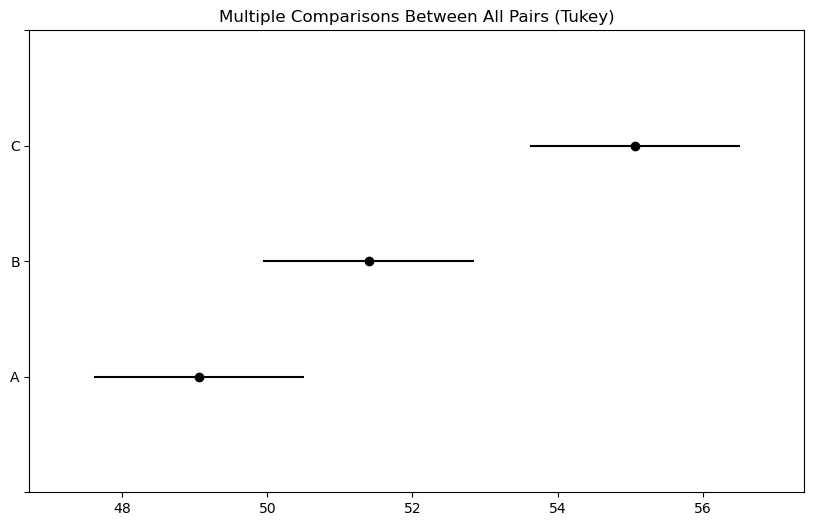

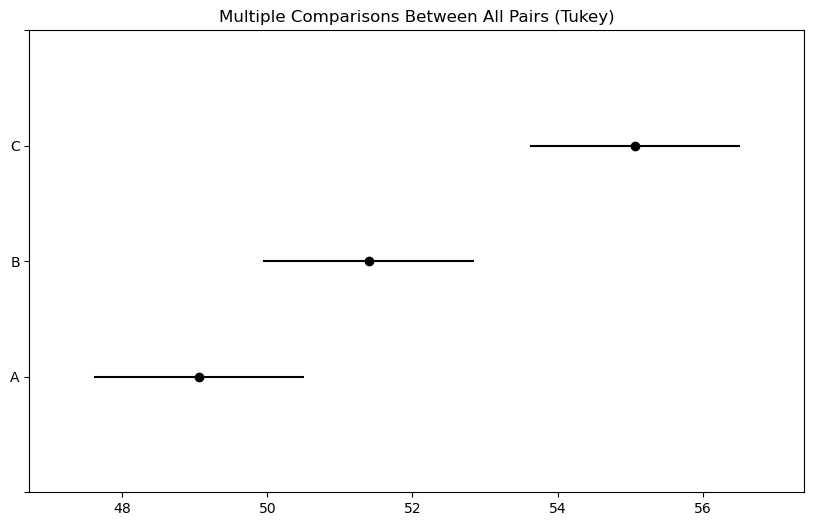

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
# Example data
np.random.seed(42)
group_a = np.random.normal(50, 5, 30)
group_b = np.random.normal(52, 5, 30)
group_c = np.random.normal(55, 5, 30)

# Combine data into a DataFrame
import pandas as pd
data = pd.DataFrame({
    'value': np.concatenate([group_a, group_b, group_c]),
    'group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['value'], data['group'], alpha=0.05)
#print(tukey_result)

# Plot results
tukey_result.plot_simultaneous()
#plt.savefig('TukeyHSD.png')

In [5]:
from scipy.stats import permutation_test

# Example data: two groups
group1 = np.random.normal(50, 5, 30)
group2 = np.random.normal(55, 5, 30)

# Permutation test
perm_test_result = permutation_test((group1, group2), 
                                    lambda x, y: np.mean(x) - np.mean(y), 
                                    alternative='two-sided', 
                                    n_resamples=10000)
print(f"Permutation test p-value: {perm_test_result.pvalue}")


Permutation test p-value: 0.0005999400059994001


In [6]:
from sklearn.utils import resample

# Example: Bootstrap mean
data = np.random.normal(50, 5, 100)
bootstrap_means = [np.mean(resample(data)) for _ in range(1000)]

# Calculate confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
print(f"Bootstrap CI: [{lower_bound}, {upper_bound}]")


Bootstrap CI: [49.16141039724455, 51.00520927204275]


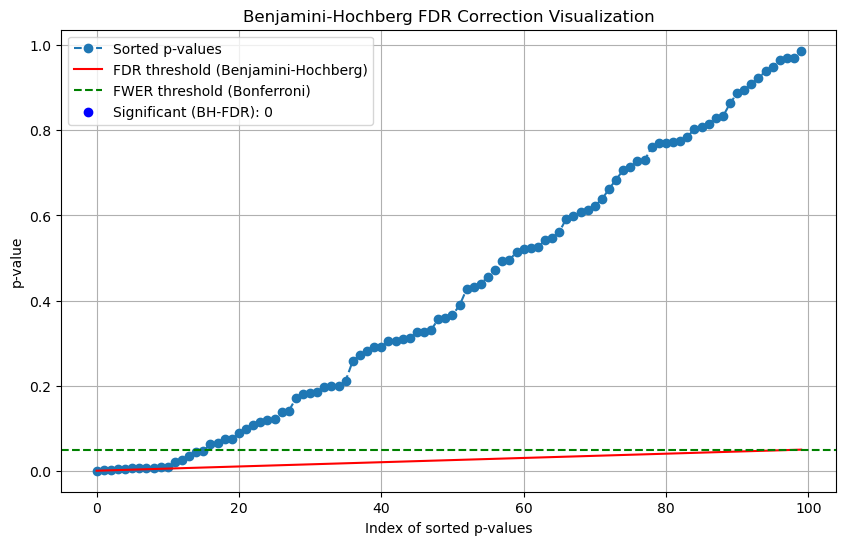

In [8]:
# Re-importing necessary libraries after code execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Example: Simulating p-values for multiple tests
np.random.seed(42)
num_tests = 100
true_positives = 10
p_values = np.concatenate([
    np.random.uniform(0, 0.01, true_positives),  # Simulated true positives
    np.random.uniform(0, 1, num_tests - true_positives)  # Simulated null p-values
])

# Applying Benjamini-Hochberg FDR correction
sorted_p_values = np.sort(p_values)
fdr_threshold = 0.05
adjusted_thresholds = fdr_threshold * np.arange(1, num_tests + 1) / num_tests

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sorted_p_values, label="Sorted p-values", marker="o", linestyle="--")
plt.plot(adjusted_thresholds, label="FDR threshold (Benjamini-Hochberg)", color="red")
plt.axhline(y=fdr_threshold, color='green', linestyle='--', label="FWER threshold (Bonferroni)")

# Highlighting significant p-values
significant_bh = sorted_p_values < adjusted_thresholds
significant_count = sum(significant_bh)
plt.scatter(
    np.where(significant_bh)[0],
    sorted_p_values[significant_bh],
    color="blue",
    label=f"Significant (BH-FDR): {significant_count}"
)

plt.title("Benjamini-Hochberg FDR Correction Visualization")
plt.xlabel("Index of sorted p-values")
plt.ylabel("p-value")
plt.legend()
plt.grid()
plt.savefig('BH.png')
plt.show()
